<a href="https://colab.research.google.com/github/Amanahmed786/Covid-19-Detection-Using-CNN/blob/main/Covid_19_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amanrocks123","key":"5550097ce2e34660dc37440bd906da3a"}'}

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d sid321axn/covid-cxr-image-dataset-research

 98% 563M/572M [00:05<00:00, 122MB/s]
100% 572M/572M [00:05<00:00, 109MB/s]


In [ ]:

!unzip \*.zip


Archive:  covid-cxr-image-dataset-research.zip
  inflating: COVID_IEEE/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: COVID_IEEE/covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: COVID_IEEE/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-b.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S0929664620300449-gr2_lrg-d.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: COVID_IEEE/covid/1-s2.0-S1684118220300682-main.pdf-003-b2.pn

In [ ]:

for dirpath,dirnames,filenames in os.walk("/content/COVID_IEEE"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 3 directories and 0 images in '/content/COVID_IEEE'.
there are 0 directories and 668 images in '/content/COVID_IEEE/normal'.
there are 0 directories and 536 images in '/content/COVID_IEEE/covid'.
there are 0 directories and 619 images in '/content/COVID_IEEE/virus'.


In [ ]:
data_dir = pathlib.Path("/content/COVID_IEEE")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['covid', 'normal', 'virus'], dtype='<U6')

In [ ]:

def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img, cmap ="gray")
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['person1298_virus_2228.jpeg']
image shape (503, 714, 3)


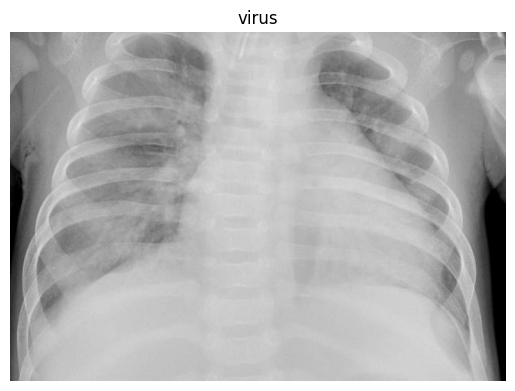

In [ ]:
img = view_image("/content/COVID_IEEE/","virus")

['NORMAL2-IM-0480-0001.jpeg']
image shape (1729, 1878)


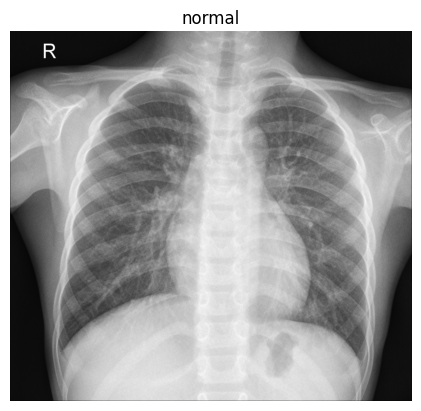

In [ ]:

img = view_image("/content/COVID_IEEE/","normal")

['1-s2.0-S1684118220300682-main.pdf-003-b1.png']
image shape (391, 436, 4)


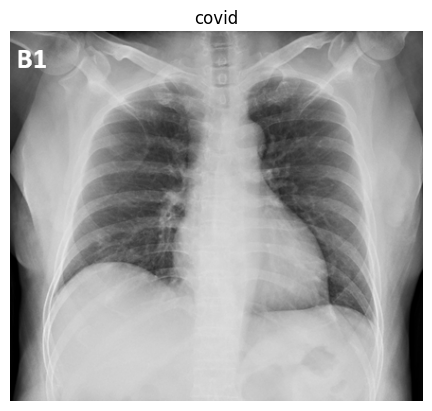

In [ ]:
img = view_image("/content/COVID_IEEE/","covid")

In [ ]:
data=[]
labels=[]
covid=os.listdir("/content/COVID_IEEE/covid/")
for a in covid:

    image = cv2.imread("/content/COVID_IEEE/covid/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)


In [ ]:
normal=os.listdir("/content/COVID_IEEE/normal/")
for a in normal:

    image = cv2.imread("/content/COVID_IEEE/normal/"+a,)
    image = cv2.resize(image, (224, 224))



    data.append(image)
    labels.append(1)

In [ ]:

virus=os.listdir("/content/COVID_IEEE/virus/")
for a in virus:

    image = cv2.imread("/content/COVID_IEEE/virus/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(2)

In [ ]:
data = np.array(data) / 255.0
img_labels = np.array(labels)




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, img_labels, test_size=0.20, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:
model = Sequential()

#Block Number 1
model.add(Conv2D(input_shape = (224,224,3), filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=32,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 2
model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))


model.add(Conv2D(filters=64,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

#Block Number 3
model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(Conv2D(filters=128,padding="same", kernel_size= (3,3)))
model.add(Activation("relu"))

model.add(MaxPool2D((2,2)))

model.add(MaxPool2D((2,2)))

# Fully Connected layer
model.add(Flatten())

model.add(Dense(units=1024, activation="relu"))

model.add(Dense(units=256, activation="relu"))


model.add(Dense(units=3, activation="softmax"))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                        

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=15, batch_size=32)

Epoch 1/15
32/32 [==============================] - 477s 15s/step - loss: 0.8151 - accuracy: 0.6108 - val_loss: 0.6628 - val_accuracy: 0.7192
Epoch 2/15
32/32 [==============================] - 467s 15s/step - loss: 0.4544 - accuracy: 0.8294 - val_loss: 0.3991 - val_accuracy: 0.8767
Epoch 3/15
32/32 [==============================] - 450s 14s/step - loss: 0.2596 - accuracy: 0.9118 - val_loss: 0.3217 - val_accuracy: 0.8904
Epoch 4/15
32/32 [==============================] - 417s 13s/step - loss: 0.1890 - accuracy: 0.9333 - val_loss: 0.2662 - val_accuracy: 0.9132
Epoch 5/15
32/32 [==============================] - 409s 13s/step - loss: 0.1591 - accuracy: 0.9382 - val_loss: 0.4841 - val_accuracy: 0.8493
Epoch 6/15
32/32 [==============================] - 450s 14s/step - loss: 0.1568 - accuracy: 0.9402 - val_loss: 0.2235 - val_accuracy: 0.9201
Epoch 7/15
32/32 [==============================] - 412s 13s/step - loss: 0.0934 - accuracy: 0.9686 - val_loss: 0.3444 - val_accuracy: 0.9132
Epoch 